In [1]:
import pandas as pd

In [2]:
final_df=pd.read_csv("/Users/anuragchaubey/SalesFlux/data/processed/final_data.csv")

In [3]:
final_df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
productid,511799,500,P0045,1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,511799,10,L04,140106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,511799,365,2024-06-10,1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unitssold,511799.0,NaN,NaN,NaN,58.655603,32.318947,-0.0,44.0,53.0,64.0,226.0
promocodeused,511799,2,No,299193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,511799.0,NaN,NaN,NaN,300.372375,59.173884,100.01,300.5,300.5,300.5,500.0
discount_percent,511799.0,NaN,NaN,NaN,2.897309,5.813152,0.0,0.0,0.0,0.0,20.0
competitorprice,511799.0,NaN,NaN,NaN,315.402575,63.829606,90.24,315.525,315.525,315.525,599.5
adcampaign,134776,2,Tv,78645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
finalprice,511799.0,NaN,NaN,NaN,291.686172,55.691474,80.016,300.5,300.5,300.5,499.99


In [4]:
final_df.groupby('productid')['unitssold'].sum().sort_values(ascending=False).head(10)


productid
P0221    67735.0
P0072    66927.0
P0265    66231.0
P0045    65813.0
P0194    65789.0
P0097    65702.0
P0431    65686.0
P0215    65623.0
P0059    65569.0
P0428    65312.0
Name: unitssold, dtype: float64

In [5]:
final_df['revenue'] = final_df['unitssold'] * final_df['price']
final_df.groupby('location')['revenue'].sum().sort_values(ascending=False)


location
L04    2.237659e+09
L07    1.450186e+09
L03    1.332809e+09
L01    1.071348e+09
L10    5.221138e+08
L05    4.580182e+08
L06    4.230058e+08
L08    3.217674e+08
L02    2.144890e+08
L09    1.413528e+08
Name: revenue, dtype: float64

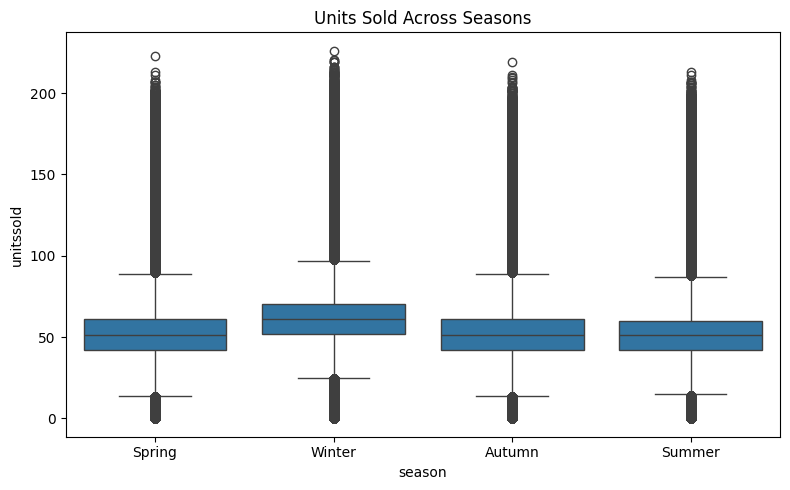

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=final_df, x='season', y='unitssold')
plt.title('Units Sold Across Seasons')
plt.tight_layout()
plt.show()


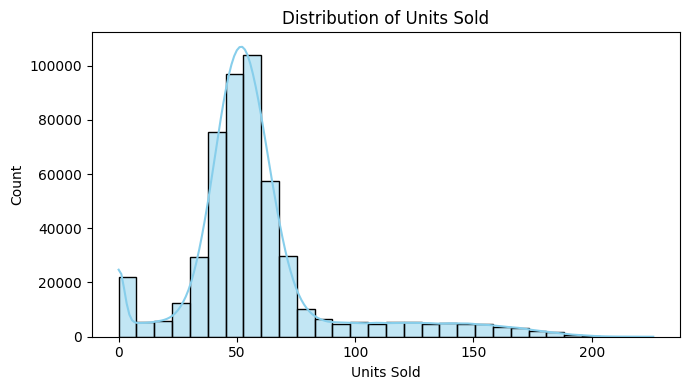

In [7]:
plt.figure(figsize=(7, 4))
sns.histplot(final_df['unitssold'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


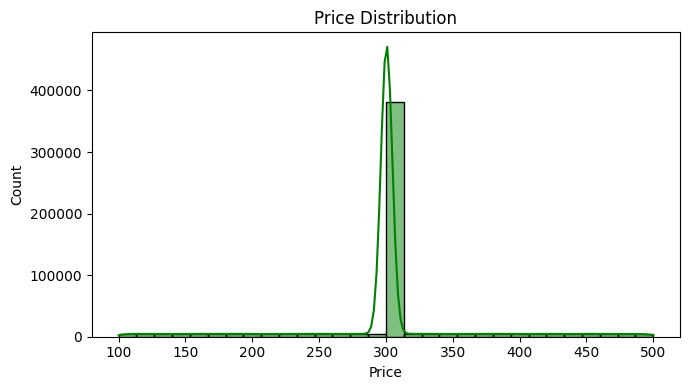

In [8]:
plt.figure(figsize=(7, 4))
sns.histplot(final_df['price'], kde=True, bins=30, color='green')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.tight_layout()
plt.show()


/var/folders/wz/4tdnltpd0j50hb4mv_kk_0140000gn/T/ipykernel_3286/2214156011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='discount_percent', data=final_df, palette='coolwarm')


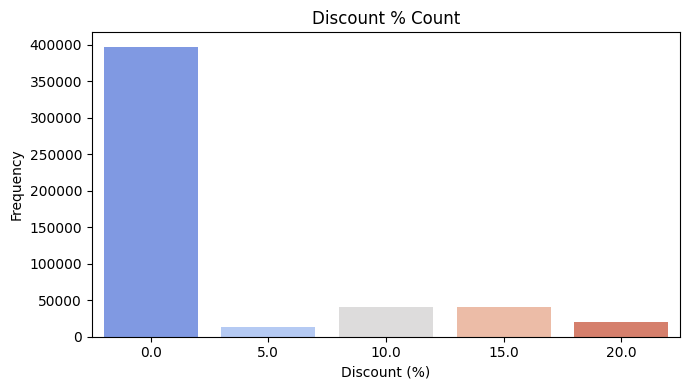

In [9]:
plt.figure(figsize=(7, 4))
sns.countplot(x='discount_percent', data=final_df, palette='coolwarm')
plt.title('Discount % Count')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


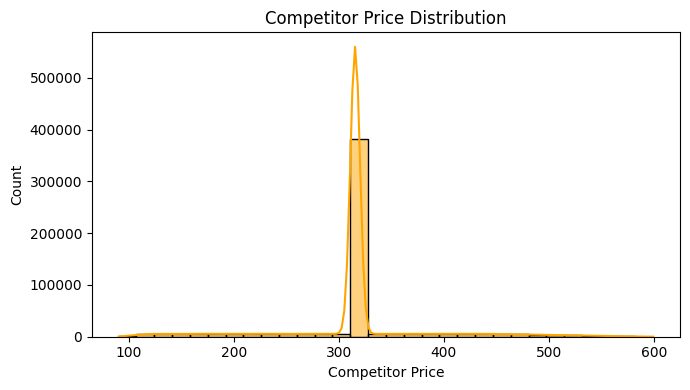

In [10]:
plt.figure(figsize=(7, 4))
sns.histplot(final_df['competitorprice'], kde=True, bins=30, color='orange')
plt.title('Competitor Price Distribution')
plt.xlabel('Competitor Price')
plt.tight_layout()
plt.show()


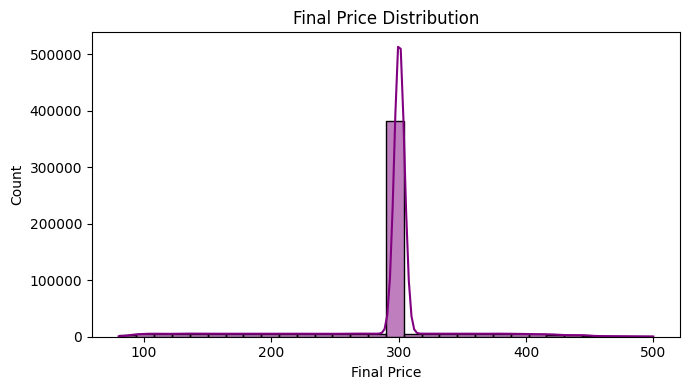

In [11]:
plt.figure(figsize=(7, 4))
sns.histplot(final_df['finalprice'], kde=True, bins=30, color='purple')
plt.title('Final Price Distribution')
plt.xlabel('Final Price')
plt.tight_layout()
plt.show()


In [12]:
final_df.head(1)

,productid,location,date,unitssold,promocodeused,price,discount_percent,competitorprice,adcampaign,finalprice,...,material,weight(kg),warranty(years),productrating,launchyear,stocklevel,supplierdelay(days),warehouse,inventorytype,revenue
0,P0080,L04,2024-04-12,90.0,No,309.98,20.0,347.76,Tv,247.984,...,Metal,4.49,1,4.8,2020,61,3,W2,Fresh,27898.2


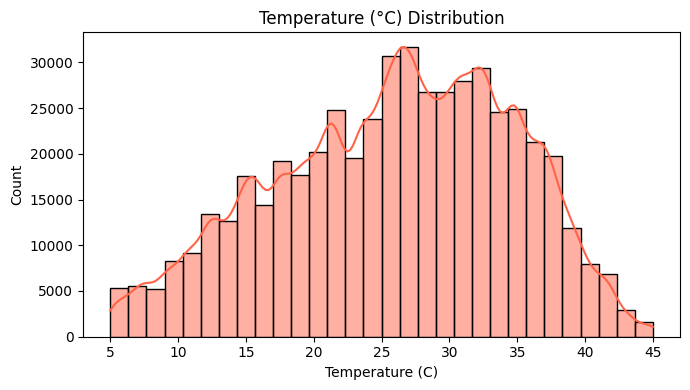

In [13]:
plt.figure(figsize=(7, 4))
sns.histplot(final_df['temp(c)'], kde=True, bins=30, color='tomato')
plt.title('Temperature (°C) Distribution')
plt.xlabel('Temperature (C)')
plt.tight_layout()
plt.show()


/var/folders/wz/4tdnltpd0j50hb4mv_kk_0140000gn/T/ipykernel_3286/1353882599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='promocodeused', data=final_df, palette='Set2')


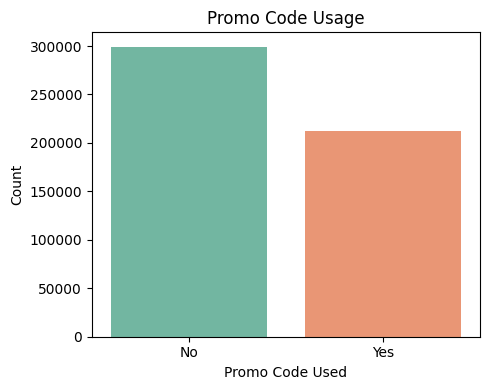

In [14]:
plt.figure(figsize=(5, 4))
sns.countplot(x='promocodeused', data=final_df, palette='Set2')
plt.title('Promo Code Usage')
plt.xlabel('Promo Code Used')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


/var/folders/wz/4tdnltpd0j50hb4mv_kk_0140000gn/T/ipykernel_3286/4218164583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='adcampaign', data=final_df, palette='Set1')


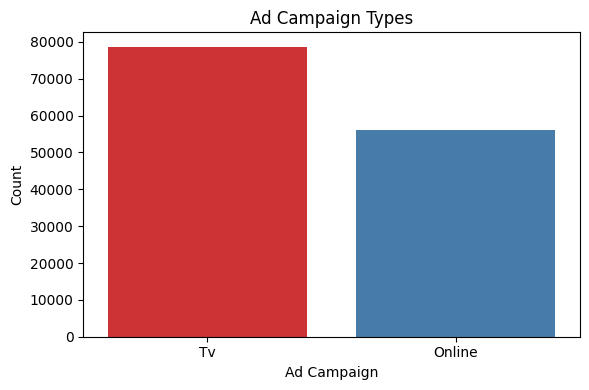

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='adcampaign', data=final_df, palette='Set1')
plt.title('Ad Campaign Types')
plt.xlabel('Ad Campaign')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


/var/folders/wz/4tdnltpd0j50hb4mv_kk_0140000gn/T/ipykernel_3286/1710473435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=final_df, palette='coolwarm')


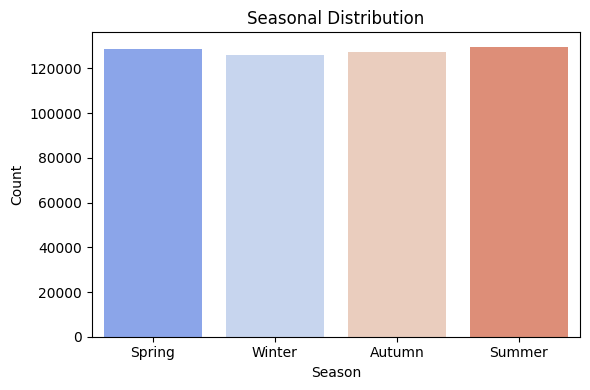

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='season', data=final_df, palette='coolwarm')
plt.title('Seasonal Distribution')
plt.xlabel('Season')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


/var/folders/wz/4tdnltpd0j50hb4mv_kk_0140000gn/T/ipykernel_3286/2735845870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='location', data=final_df, order=final_df['location'].value_counts().index, palette='Set3')


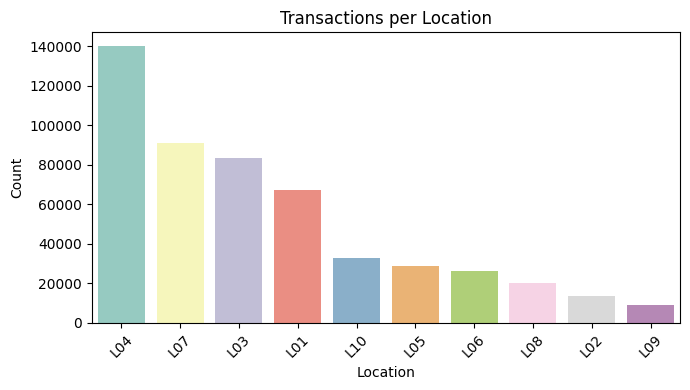

In [17]:
plt.figure(figsize=(7, 4))
sns.countplot(x='location', data=final_df, order=final_df['location'].value_counts().index, palette='Set3')
plt.title('Transactions per Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/wz/4tdnltpd0j50hb4mv_kk_0140000gn/T/ipykernel_3286/576784323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x='promocodeused', y='unitssold', palette='Set2')


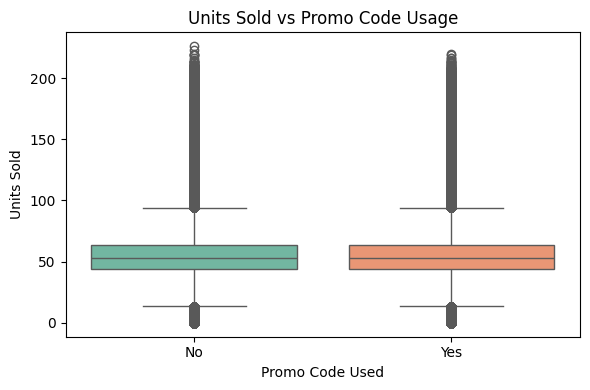

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=final_df, x='promocodeused', y='unitssold', palette='Set2')
plt.title('Units Sold vs Promo Code Usage')
plt.xlabel('Promo Code Used')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()


/var/folders/wz/4tdnltpd0j50hb4mv_kk_0140000gn/T/ipykernel_3286/315421835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x='season', y='unitssold', palette='muted')


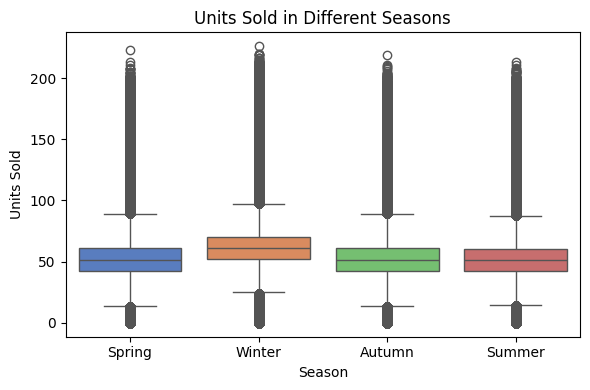

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=final_df, x='season', y='unitssold', palette='muted')
plt.title('Units Sold in Different Seasons')
plt.xlabel('Season')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()


/var/folders/wz/4tdnltpd0j50hb4mv_kk_0140000gn/T/ipykernel_3286/2810113227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue.index, y=avg_revenue.values, palette='viridis')


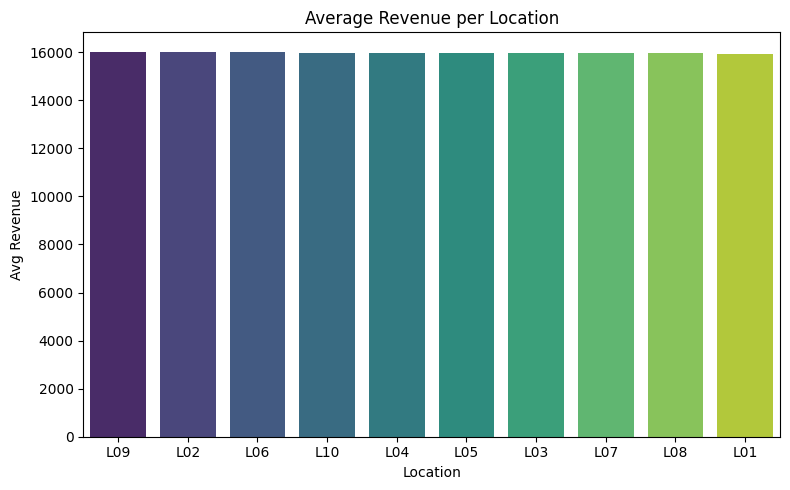

In [20]:
avg_revenue = final_df.groupby('location')['revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_revenue.index, y=avg_revenue.values, palette='viridis')
plt.title('Average Revenue per Location')
plt.xlabel('Location')
plt.ylabel('Avg Revenue')
plt.tight_layout()
plt.show()


/var/folders/wz/4tdnltpd0j50hb4mv_kk_0140000gn/T/ipykernel_3286/904634486.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ad_rev.index, y=ad_rev.values, palette='pastel')


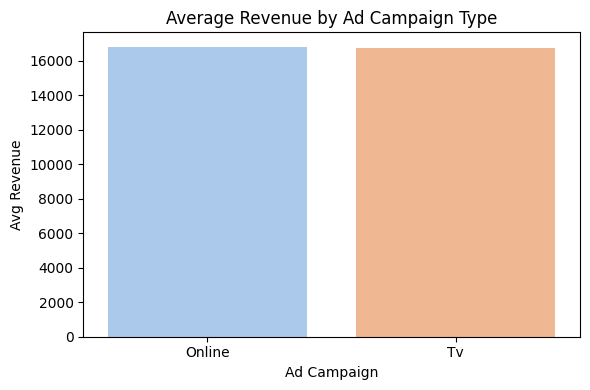

In [21]:
ad_rev = final_df.groupby('adcampaign')['revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=ad_rev.index, y=ad_rev.values, palette='pastel')
plt.title('Average Revenue by Ad Campaign Type')
plt.xlabel('Ad Campaign')
plt.ylabel('Avg Revenue')
plt.tight_layout()
plt.show()


# Correlation Heatmap (Numerical Insights)

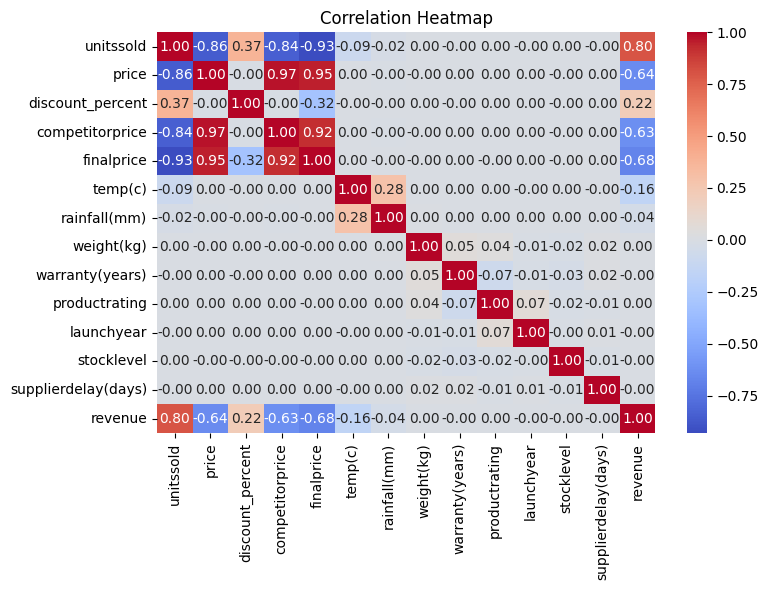

In [22]:
numeric_cols = final_df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Units Sold Over Time (Monthly Aggregation)

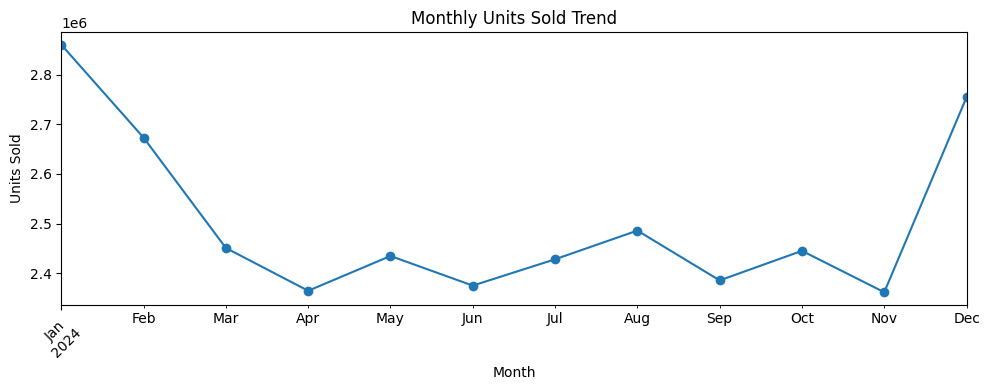

In [23]:
# Convert 'date' to datetime if not already
final_df['date'] = pd.to_datetime(final_df['date'])

# Extract month for trend
final_df['month'] = final_df['date'].dt.to_period('M')

monthly_sales = final_df.groupby('month')['unitssold'].sum()

# Plot
monthly_sales.plot(kind='line', marker='o', figsize=(10, 4), title='Monthly Units Sold Trend')
plt.ylabel('Units Sold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


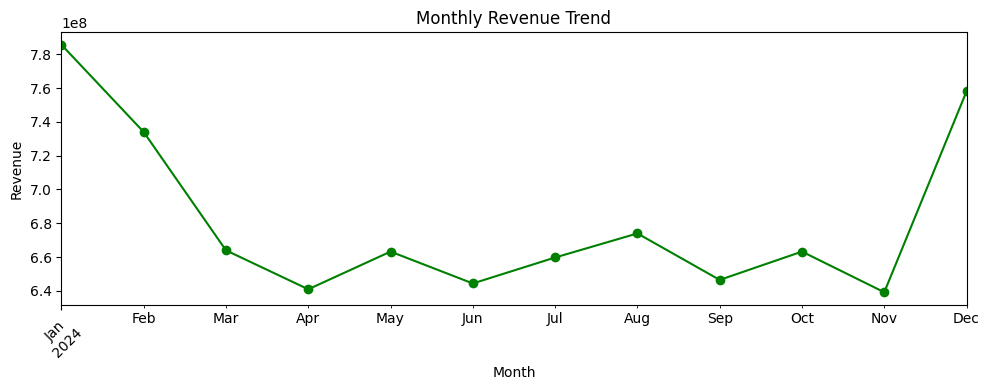

In [24]:
monthly_revenue = final_df.groupby('month')['revenue'].sum()

# Plot
monthly_revenue.plot(kind='line', marker='o', color='green', figsize=(10, 4), title='Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
